In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payment-fraud-detection/onlinefraud.csv


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter (action = 'ignore') #veriyi data frame'e kaydettik

In [3]:
#### Veri Setini Okuma
df = pd.read_csv('/kaggle/input/online-payment-fraud-detection/onlinefraud.csv')

In [4]:
### Veri Seti Bilgilerini İnceleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
### Eksik Verilerin Kontrolü
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
### Veri Setinin İlk Satırlarını Görüntüleme
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
### İstatistiksel Özeti Görüntüleme
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
### Yinelenen Verilerin Kontrolü
df.duplicated().sum()

0

In [9]:
### Gereksiz Sütunların Kaldırılması
df = df.drop(columns=["nameOrig", "nameDest"])

In [10]:
### 'type' Sütunundaki Benzersiz Değerlerin Kontrolü
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
### Veri Setinin İlk 3 Satırını Görüntüleme
df.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0


In [12]:
### Kategorik Değerlerin Sayısal Değerlere Dönüştürülmesi

df['type'] = pd.factorize(df['type'])[0]

In [13]:
### Bağımsız ve Bağımlı Değişkenlerin Ayrılması

X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [14]:
### Gerekli Kütüphanelerin İçe Aktarılması

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
### Veri Setinin Eğitim ve Test Setlerine Ayrılması

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
### Verilerin Standartlaştırılması için StandardScaler Nesnesinin Oluşturulması

scaler = StandardScaler()

In [17]:
### Eğitim Verilerinin Standartlaştırılması

X_train_scaled = scaler.fit_transform(X_train)

In [18]:
### Test Verilerinin Standartlaştırılması

X_test_scaled = scaler.transform(X_test)

In [19]:
###Random Forest modelini oluşturdum

rf_model = RandomForestClassifier()

In [20]:
### Modelin Eğitilmesi

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [21]:
### Eğitim Verilerinin Boyutlarının Kontrolü

print(X_train_scaled.shape)
print(len(y_train))

(5090096, 8)
5090096


In [22]:
### Eğitim Verilerindeki Eksik Değerlerin Kontrolü

print(X_train.isnull().sum()) 
print(y_train.isnull().sum())

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
dtype: int64
0


In [23]:
### Test Verileri Üzerinde Tahmin Yapılması

rf_predictions = rf_model.predict(X_test_scaled)

In [24]:
### Test Verileri Üzerinde Tahmin Yapılması (Tekrar)

y_pred = rf_model.predict(X_test_scaled)

In [25]:
### Model Performansının Değerlendirilmesi

print("Random Forest Performans Raporu:")
print(classification_report(y_test, rf_predictions))
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Performans Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.79      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Karışıklık Matrisi:
[[1270879      25]
 [    333    1287]]


In [26]:
### Modelin Doğruluğunun Hesaplanması

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy:.2f}")

Doğruluk: 1.00


In [27]:
### Karışıklık Matrisinin Hesaplanması

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:")
print(conf_matrix)

Karışıklık Matrisi:
[[1270879      25]
 [    333    1287]]


In [28]:
### Karışıklık Matrisinin Hesaplanması

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(report)

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.79      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [29]:
### Modelin Kaydedilmesi

import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [30]:
### Modelin Yüklenmesi

rf_model = joblib.load('random_forest_model.pkl')

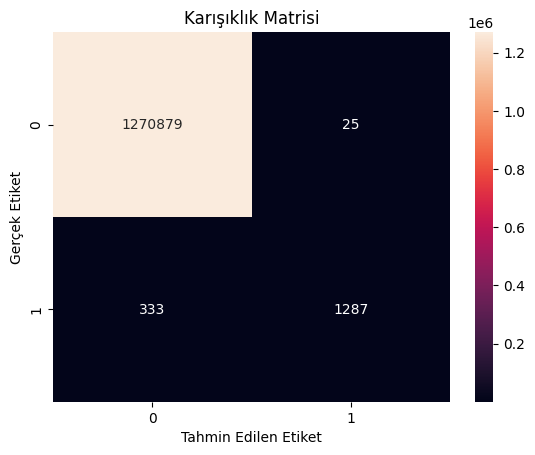

In [31]:
### Karışıklık Matrisinin Görselleştirilmesi

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()

In [32]:
### Özelliklerin Öneminin Hesaplanması ve Sıralanması

importances = rf_model.feature_importances_
features = X_train.columns  # Özellik adlarını ayarlayın

# Özelliklerin önemini sıralama
feature_importances = sorted(zip(importances, features), reverse=True)
print("Özelliklerin Önemi:")
for importance, feature in feature_importances:
    print(f"{feature}: {importance:.4f}")

Özelliklerin Önemi:
oldbalanceOrg: 0.3140
newbalanceDest: 0.2193
amount: 0.1512
type: 0.1057
step: 0.1053
oldbalanceDest: 0.0640
newbalanceOrig: 0.0384
isFlaggedFraud: 0.0020


In [33]:
### Görselleştirme için gerekli Kütüphanelerin İçe Aktarılması

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
### Tahmin Sonuçlarının DataFrame Olarak Oluşturulması

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

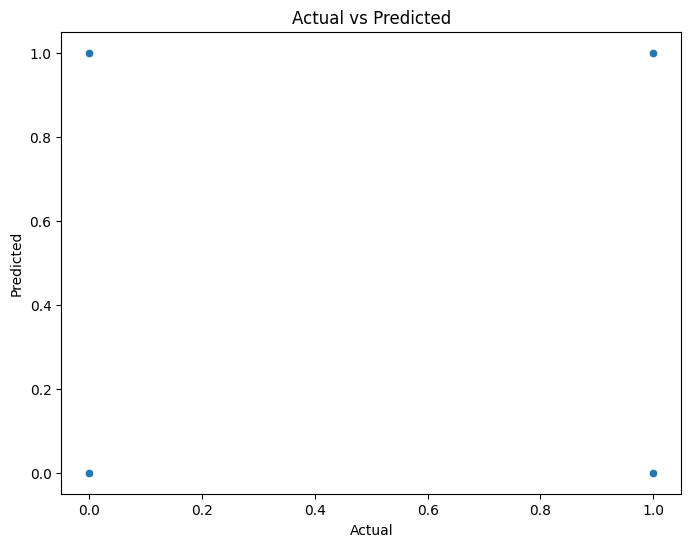

In [35]:
### Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [36]:
### Regresyon Analizi için Gerekli Kütüphanelerin İçe Aktarılması

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
# Örnek veri oluşturma
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Özellikler
y = 4 + 3 * X + np.random.randn(100, 1)  # Hedef değişken

In [38]:
# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [39]:
# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Tahminler
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model değerlendirmesi
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Eğitim Verisi Ortalama Kare Hata (MSE): {mse_train:.2f}")
print(f"Test Verisi Ortalama Kare Hata (MSE): {mse_test:.2f}")

Eğitim Verisi Ortalama Kare Hata (MSE): 0.99
Test Verisi Ortalama Kare Hata (MSE): 1.04


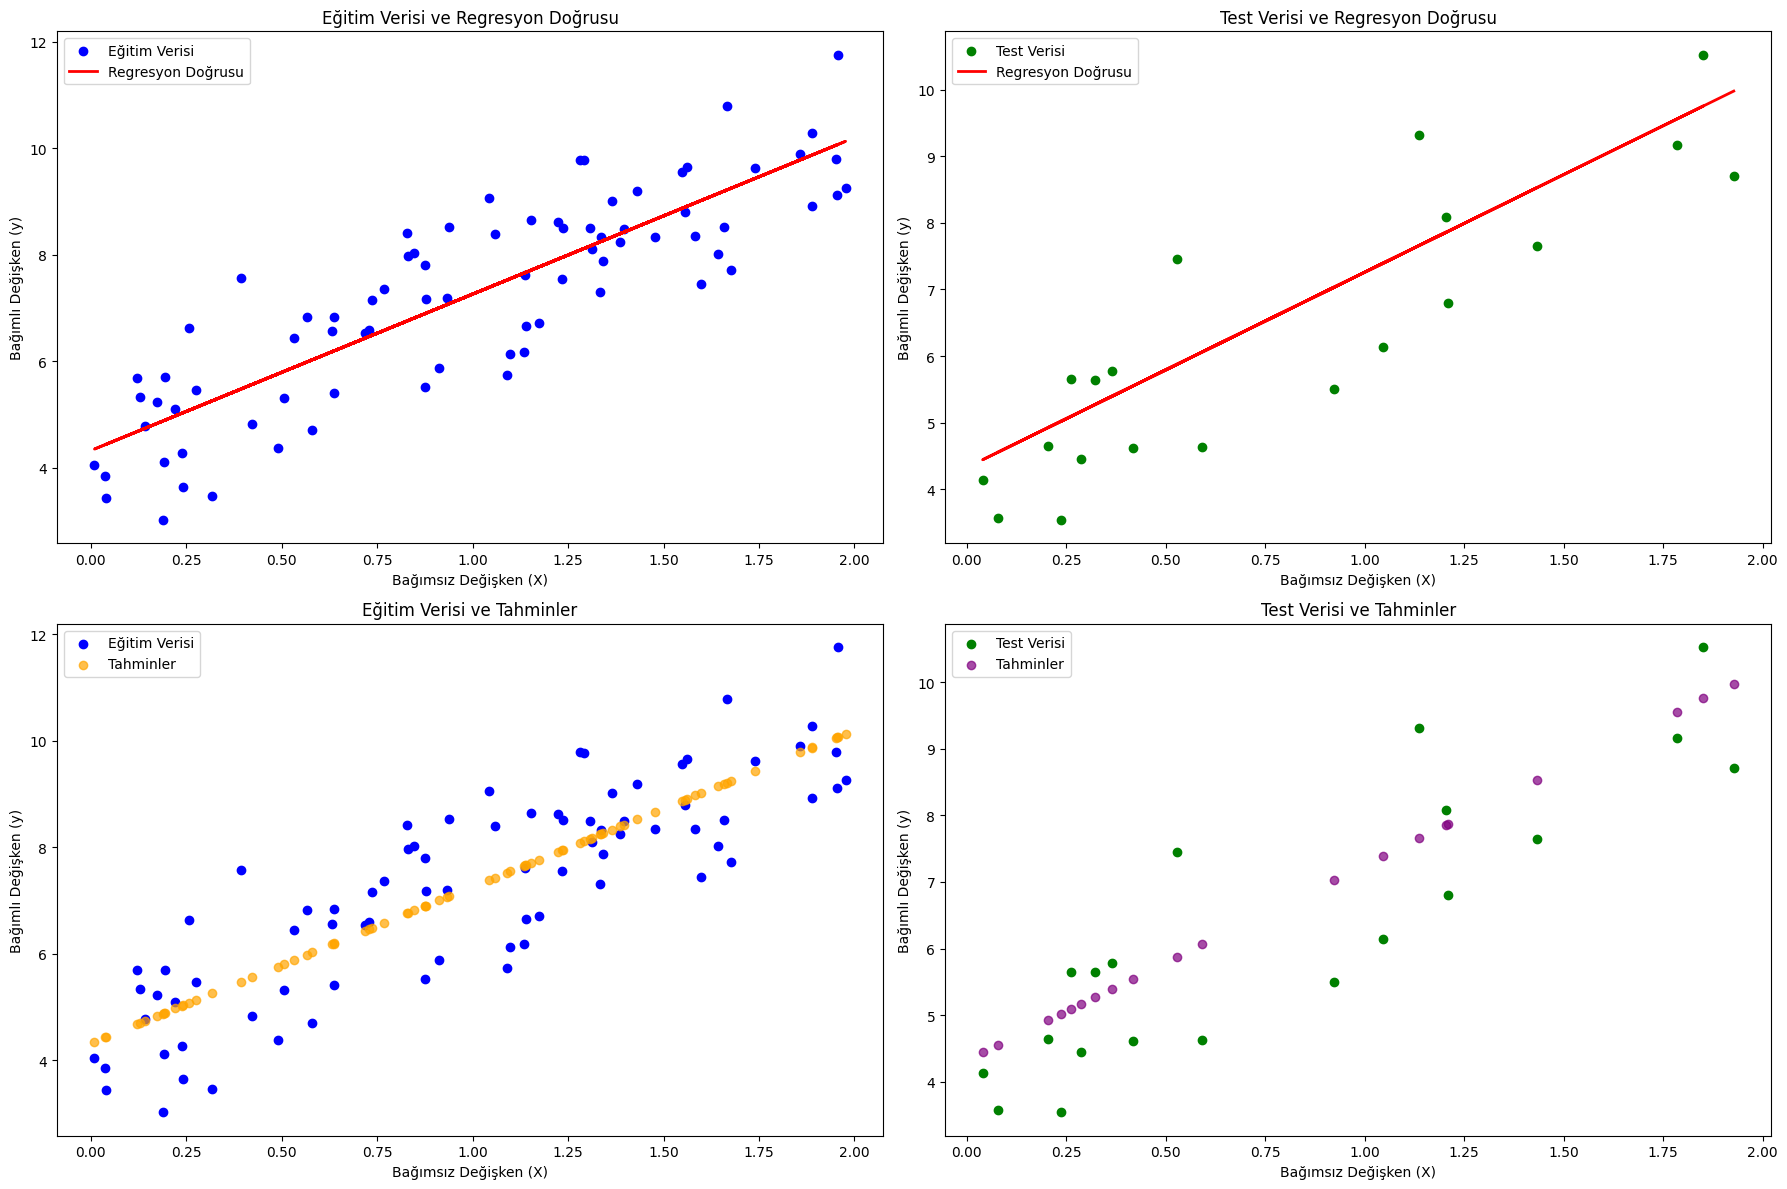

In [41]:
# Grafikleri oluşturma
plt.figure(figsize=(18, 12))

# Eğitim verileri ve regresyon doğrusu
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Eğitim Verisi')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Bağımsız Değişken (X)')
plt.ylabel('Bağımlı Değişken (y)')
plt.title('Eğitim Verisi ve Regresyon Doğrusu')
plt.legend()

# Test verileri ve regresyon doğrusu
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test Verisi')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Bağımsız Değişken (X)')
plt.ylabel('Bağımlı Değişken (y)')
plt.title('Test Verisi ve Regresyon Doğrusu')
plt.legend()

# Eğitim verisi ve tahminler
plt.subplot(2, 2, 3)
plt.scatter(X_train, y_train, color='blue', label='Eğitim Verisi')
plt.scatter(X_train, y_train_pred, color='orange', label='Tahminler', alpha=0.7)
plt.xlabel('Bağımsız Değişken (X)')
plt.ylabel('Bağımlı Değişken (y)')
plt.title('Eğitim Verisi ve Tahminler')
plt.legend()

# Test verisi ve tahminler
plt.subplot(2, 2, 4)
plt.scatter(X_test, y_test, color='green', label='Test Verisi')
plt.scatter(X_test, y_test_pred, color='purple', label='Tahminler', alpha=0.7)
plt.xlabel('Bağımsız Değişken (X)')
plt.ylabel('Bağımlı Değişken (y)')
plt.title('Test Verisi ve Tahminler')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
# 'isFraud' sütununun değerlerinin sayısını hesaplayın
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


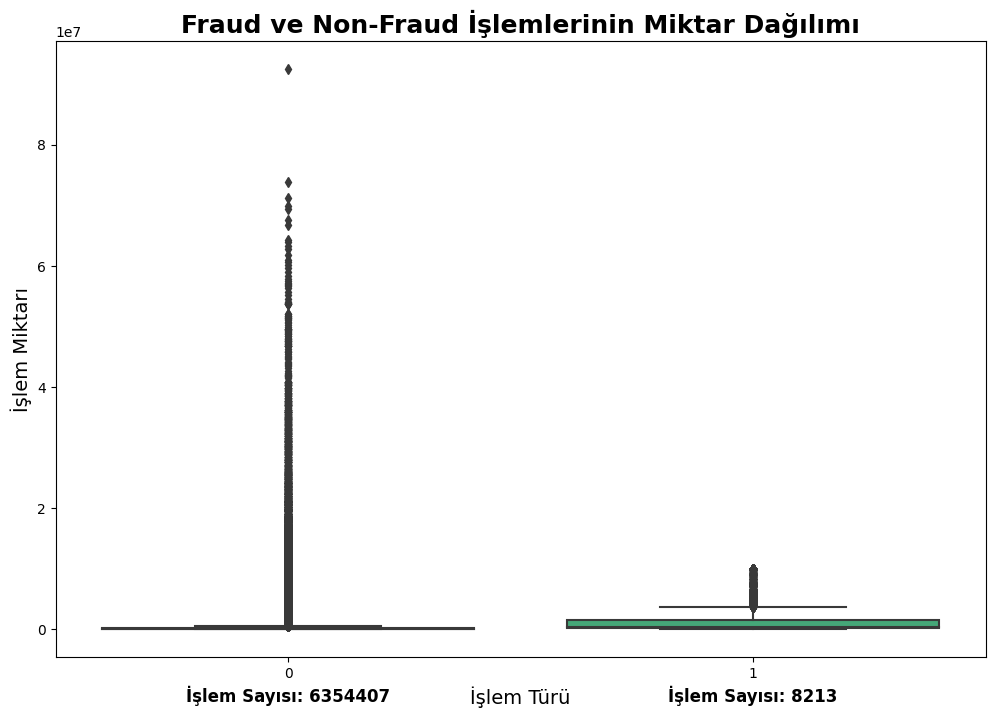

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi tekrar yükleyin
df = pd.read_csv('/kaggle/input/online-payment-fraud-detection/onlinefraud.csv')

# Kutu grafiği oluşturun
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='isFraud', y='amount', data=df, palette='viridis')

# Grafik başlığını ve etiketleri ayarlayın
plt.title('Fraud ve Non-Fraud İşlemlerinin Miktar Dağılımı', fontsize=18, weight='bold')
plt.xlabel('İşlem Türü', fontsize=14)
plt.ylabel('İşlem Miktarı', fontsize=14)

# Kutu grafiğinin alt kısmına işlem sayılarını ekleyin
for i, label in enumerate(fraud_counts.index):
    count = fraud_counts[label]
# Y ekseninde en düşük değeri biraz daha aşağıda ayarlayın
    y_position = df['amount'].min() - (df['amount'].max() - df['amount'].min()) * 0.1
    plt.text(i, y_position, f'İşlem Sayısı: {count}', 
             ha='center', va='top', fontsize=12, color='black', weight='bold')

# Grafiği gösterin
plt.show()